In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import regression_utils as ru

from sklearn.linear_model import LinearRegression

In [3]:
dataframe = pd.read_csv("./Data/train.csv")
dataframe = dataframe[['LotArea', 'SalePrice']]
dataframe

,LotFrontage,LotArea,SalePrice
0,65.0,8450,208500
1,80.0,9600,181500
2,68.0,11250,223500
3,60.0,9550,140000
4,84.0,14260,250000
...,...,...,...
1455,62.0,7917,175000
1456,85.0,13175,210000
1457,66.0,9042,266500
1458,68.0,9717,142125


In [4]:
def get_values(lot_areas: np.ndarray, sale_prices: np.ndarray, epochs: int, learning_rate: float):
    m = 0
    b = 0

    loss_values = []
    for _ in range(epochs):
        m, b, loss_value = ru.lr_gradient_descent(m, b, lot_areas, sale_prices, learning_rate)
        loss_values.append(loss_value)

    return m, b, loss_values

In [5]:
def plot_loss(epochs: int, loss_values: np.ndarray):
    figure, loss = plt.subplots()
    figure.set_label("Loss")
    epoch_values = [x for x in range(epochs)]
    loss.plot(epoch_values, loss_values)

In [6]:
def get_my_predictions(lot_areas, sale_prices, epochs, learning_rate):
    m, b, loss_values = get_values(lot_areas, sale_prices, epochs, learning_rate)
    return [m * lot_area + b for lot_area in lot_areas], loss_values

In [7]:
def get_sk_predictions(lot_areas, sale_prices):
    return LinearRegression().fit(lot_areas, sale_prices).predict(lot_areas)

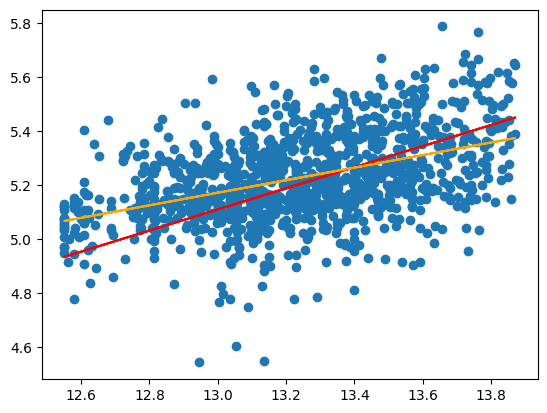

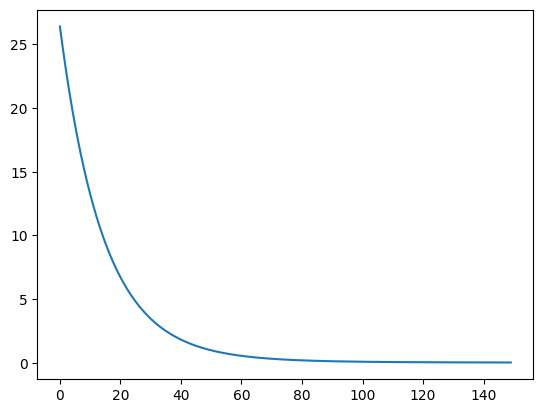

In [8]:
learning_rate = 0.0001
epochs = 150

scaled_lot_area = np.log2(np.array(dataframe['LotArea']))
scaled_sale_price = np.log10(np.array(dataframe['SalePrice']))

(scaled_features, scaled_sale_price) = ru.reject_outliers([scaled_lot_area], scaled_sale_price, 65, 35, 1.5)
scaled_lot_area = scaled_features[0]
my_predictions, loss_values = get_my_predictions(scaled_lot_area, scaled_sale_price, epochs, learning_rate)
sk_predictions = get_sk_predictions(scaled_lot_area.reshape(1, -1).transpose(), scaled_sale_price.reshape(1, -1).transpose())

plt.scatter(scaled_lot_area, scaled_sale_price)
plt.plot(scaled_lot_area, my_predictions, color='red')
plt.plot(scaled_lot_area, sk_predictions, color='orange')

plot_loss(epochs, loss_values)

In [9]:
predictions_dataframe = pd.DataFrame({
    'Lot Area': scaled_lot_area,
    'Sale Price': scaled_sale_price,
    'Sale Price (My)': my_predictions,
    'Sale Price (SK)': sk_predictions
})

ValueError: Per-column arrays must each be 1-dimensional